# Some of the Most Important ML Algorithms
![Essential ML algorithms](img/ML-map.png)

# Elementary Notions in Probability

A quick reminder on probability theory: https://youtu.be/a-IVT3AxwSg

## Sample space $\Omega$

> A _sample space_ is a set with elements describing the outcomes (also called elementary events) of the experiment in which we are interested.

Examples:
* Tossing a coin:
  $\Omega = \{Head, Tail\}$
* Number of bees in Europe: $\Omega = \mathbb{N}$
* Guessing the month when someone is born:
  $\Omega = \{Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec\}$
  
In Python, these can be represented simply as [sets](https://docs.python.org/3/library/stdtypes.html?highlight=set#set).

In [1]:
omega = {'H', 'T'} # Or use the set() constructor
print('Omega:',omega)

Omega: {'T', 'H'}


---
**Give it a try!**

Print the sample space corresponding to a single die throw, using [`range()`](https://docs.python.org/3/library/functions.html#func-range).

In [2]:
# Your code here

Expected result: `{1, 2, 3, 4, 5, 6}`

---

## Event $A \subseteq \Omega$

> An _event_ is a subset of the sample space.

Examples:
* The certain event: $\Omega$
* The impossible event: $\emptyset$
* Result of a coin toss: $A = \{Head\}$
* Knowing the someone is born in a summer month: $A=\{Jun, Jul, Aug\}$

### Operations

Generating a random event from a given sample space is effectively random sampling without replacement, so the `sample` function from the [random](https://docs.python.org/3/library/random.html) library can be used:

In [3]:
from random import sample, seed
seed(42)
omega = set(range(10))
A = set(sample(list(omega), k=3))
B = set(sample(list(omega), k=5))
print("Omega:", omega)
print("A:", A)
print("B:",B)

Omega: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
A: {0, 1, 4}
B: {0, 2, 3, 5, 9}


Since events are sets, we can operate with events using the regular set operations: `union`, `intersection`, `difference`.

In [4]:
A = {1, 2}
B = {2, 3}
omega = {1,2,3,4}
print(A.union(B))        # Or A|B
print(A.intersection(B)) # Or A&B
print(A.difference(B))   # Or A-B

{1, 2, 3}
{2}
{1}


We can visualise these operations using the [matplotlib_venn](https://pypi.org/project/matplotlib-venn/) library:

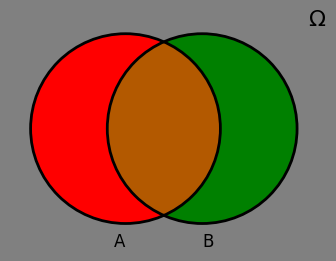

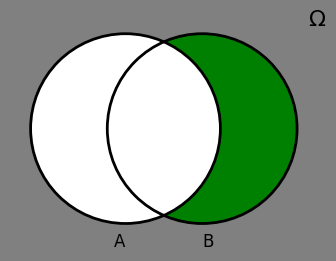

In [5]:
from tools.venn import A, B, omega, plot_venn
plot_venn(omega)   # Print the entire space
plot_venn(omega-A) # Print not A

---
**Give it a try!**

Using the `plot_venn()` function and the existing `A`, `B` and `omega` variables, show that $A - B = A \cap \neg B$.

In [6]:
from tools.venn import A, B, omega, plot_venn
# Your code here

---

### Disjoint Events
Events A and B are called _disjoint_ or _mutually exclusive_ if A and B have no outcomes in common. In set notation: $A \cap B = \emptyset$.

---
**Give it a try!**

Determine if the events $A$ and $B$ are disjoint:

In [7]:
from random import sample, seed
seed(5)
A = set(sample(range(1000), k=50))
B = set(sample(range(1000), k=50))
# Code here

Expected result: no, they have elements {186, 707} in common.

---

## Probability

> A _probability function_ $P$ on a finite sample space $\Omega$ assigns to  each event $A$ in $\Omega$ a number $P(A)$ in $[0,1]$ such that:
> 1. $P(\Omega)=1$ and
> 1. $P(A \cup B) = P(A)+P(B)$ if $A$ and $B$ are disjoint.

The number $P(A)$ is called the probability that $A$ occurs.

Consequently, if we have a finite space **and all outcomes are equally likely**:

$P(A) = \frac{\mbox{\#favourable outcomes}}{\mbox{\#all outcomes}} = \frac{|A|}{|\Omega|}$

Useful properties resulting from the definition:
1. $P(\emptyset) = 0$
1. $P(\neg A) = 1-P(A)$
1. $A \subseteq B \Rightarrow P(A) \leq P(B)$
1. $P(A \setminus B) = P(A) - P(A \cap B)$
1. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

---
**Give it a try!**

Prove the first property: $P(\emptyset) = 0$ using only the definition.

---

### Example 1

What is the probability that a die will turn an even number?

In [8]:
from tools.stats import probability

omega = set(range(1,7))
print('Omega:', omega)
A = set(a for a in omega if a % 2 == 0)
print('A:', A)
print('P(A):', probability(A, omega))

Omega: {1, 2, 3, 4, 5, 6}
A: {2, 4, 6}
P(A): 0.5


### Example 2

If not all outcomes are equally likely, we can use a weighted sum instead of simply counting the outcomes. The `probability_weighted` function does just that. 

If we have an unfair coin with a 75% chance of showing 'Head':

In [9]:
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    side: str
        
omega = set([Outcome(side='Head', weight=0.75), 
            Outcome(side='Tail', weight=0.25)])
A = set(o for o in omega if o.side == 'Head')
probability_weighted(A, omega)

0.75

## Products of sample spaces

Often in practice, more than one experiment is considered at a time. For instance, if we throw a coin two times, we would have two sample spaces $\Omega_2 = \Omega_1 = \{H, T\}$.

We can treat both trows as a single event with the sample space 

$\Omega = \Omega_1 \times \Omega_2 = \{(H,H), (H,T), (T,H), (T,T)\}$

or generally

$\Omega = \Omega_1 \times \Omega_2 = \{(\omega_1, \omega_2): \omega_1 \in \Omega_1, \omega_2 \in \Omega_2\}$

This corresonds to a cartesian product, so in Python it can be achieved throught the [product](https://docs.python.org/3/library/itertools.html#itertools.product) function:

In [10]:
from itertools import product
A = set(product(['a','b'], [1, 2]))
print(A)

{('a', 2), ('b', 2), ('a', 1), ('b', 1)}


### Example

What is the probability that by throwing a coin two times we will get tails at least once?

In [11]:
from itertools import product
from tools.stats import probability
omega_1=set(['H', 'T'])
omega_2=set(['H', 'T'])
omega=set(product(omega_1, omega_2))
print('Omega:', omega)
A = set(a for a in omega if 'T' in a)
print('A:', A)
print('P(A)=', probability(A, omega))

Omega: {('T', 'T'), ('H', 'T'), ('T', 'H'), ('H', 'H')}
A: {('T', 'T'), ('H', 'T'), ('T', 'H')}
P(A)= 0.75


---
**Give it a try!**

What is the probability that a family with two children will have two girls?


In [12]:
from itertools import product
from tools.stats import probability
omega_1={'B', 'G'} # First child
omega_2={'B', 'G'} # Second child
# Your code here

Expected result: 0.25

---

## Conditional probabilities

> The _conditional probability of A given B_ is defined as:
> 
> $P(A|B)= \frac{P(A\cap B)}{P(B)}$

Also called _posterior probability of A, given B_.

Useful properties resulting from the definition:
1. The multiplication rule:

  $P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)$ 
  
1. The chain rule:

  $P(A_1 \cap A_2 ... \cap A_n) = P(A_1)P(A_2|A_1)...P(A_n|A_1,A_2,...,A_{n-1})$
  
1. The law of total probability (for two events):

  $P(A) = P(A|B)P(B)+P(A| \neg B)P(\neg B)$
  
1. The law of total probability (for multiple events):

  $P(A) = P(A|B_1)P(B_1)+P(A|B_2)P(B_2)+...+P(A|B_n)P(B_n)$ where $B_1,...B_n$ are disjoint events such that $A \subseteq  B_1 \cup ... \cup B_n$

### Example

What is the probability that the current month has 31 days knowning that it's summer? We can model the problem using events like this:
* $\Omega$ is the sample spece of all months: $\Omega = \{Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec\}$
* $A$ is the event "month with 31 days": $A=\{Jan, Mar, May, Jul, Aug, Oct, Dec\}$
* $B$ is the event "month is a summer month": $B=\{Jun, Jul, Aug\}$
* We are interested in finding $P(A|B)$.

$P(A|B)= \frac{P(A\cap B)}{P(B)} = \frac{|\{Jul, Aug\}|}{|\{Jun, Jul, Aug\}|}=\frac{2}{3}$

Or, using Python and the `probability` function defined above:

In [13]:
from tools.stats import probability
omega = set(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
A = set(['Jan', 'Mar', 'May', 'Jul', 'Aug', 'Oct', 'Dec'])
B = set(['Jun', 'Jul', 'Aug'])
res1 = probability(A&B, omega) / probability(B, omega)
res2 = probability(A&B, B) # We can just repace omega with B
print(res1)
print(res2)

0.6666666666666666
0.6666666666666666


---

**Give it a try!**

A bowl contains $w$ white balls and $b$ black balls. 

 1. We first extract one of these, at random.
 2. We then place it back, together with $d$ other balls of the same colour.
 3. We take out another ball at random.

Prove that the probablity that the second ball is white, does not depend on $d$.

---


## Bayes' Theorem

![Bayes Theorem neon sign at HP Authonomy](img/Bayes_Theorem.jpg)

Bayes' theorem can be interpreted as linking the degree of belief in a proposition before and after accounting for evidence.

---
**Give it a try!**

Prove Bayes' theorem using the definition of conditional probabilities.

---

## Independent events

> An event A is called _independent of B_ if $P(A|B)=P(A)$

Useful properties:
1. Two events $A$ and $B$ are independent if $P(A \cap B) = P(A)P(B)$
1. Conditionally independent events: $P(A\cap B\ |\ C)=P(A|C)P(B|C)$

# Elementary Notions in Statistics

* Main ideas behind probability distributions in general: https://youtu.be/oI3hZJqXJuc
* The normal distribution, clearly explained: https://youtu.be/rzFX5NWojp0

## Random variables

> A _random variable_ is a function that assigns a real value to each outcome from a sample space $\Omega$.

It usually denoted by capital letters: $X: \Omega \to \mathbb{R}$.

In many cases the random variable is effectively just a way to model the output of an experiment as a number.

In a mathematical sense, it is *not random* and *not a variable*. The name makes sense when analysing phenomena from a statistical perspective: it is a variable because it can influence the studied outcome (i.e. temperature and humidity are important variables in analysing precipitation levels) and are random because their values are unpredictable (even if we can assign some probabilities to them, they are effectively outside our control).

Several different random variables can be defined on the same sample space.

### Example

Since random variables are just associations between omega and a number, the simplest way to represent a random variable would be through a dictionary. So for the tossing of a coin, for example, we can have:

In [1]:
omega = set(['H', 'T'])
X = {'H': 1, 'T': -1}
print(X['H'])

1


If two random variables are independent, they can be added or multiplied by adding or multiplying their corresponding values:

In [7]:
omega = set(['H', 'T'])
X = {'H': 1, 'T': -1}
Y = {'H': 2, 'T': 3}
Z = {o: X[o]+Y[o] for o in omega} # Z = X + Y
print('Z=X+Y:', Z)
Z = {o: X[o]*Y[o] for o in omega} # Z = X * Y
print('Z=XY:', Z)

Z=X+Y: {'T': 2, 'H': 3}
Z=XY: {'T': -3, 'H': 2}


---
**Give it a try!**

Create two random variables $A, B$ on the same sample space $\Omega=\{red, green, blue\}$ and add them together.

In [3]:
# Your code here

---

## Discrete random variables

> Let $\Omega$ be a sample space. A _discrete random variable_ is a function $X: \Omega \to \mathbb{R}$ that takes on a finite number of values $a_1, a_2,\dotsc,a_n$ or a countably infinite number of values $a_1, a_2,\dotsc$.

Examples:
* Tossing a coin
* Number of bees in Europe
* How many tries it takes to get a 6 on a die

> Two discrete random variables $X$ and $Y$ are *independent* if $P(X=x,Y=y)=P(X=x)P(Y=y)$ for all $x$, $y$.

### Probability mass function (pmf)

> The _probability mass function_ $p$ of a discrete random variable $X$ is the function $p:\mathbb{R} \to [0,1]$ defined by
>
>  $p(a) = P(X = a)=P(\{ \omega \in \Omega | X(\omega) = x\})$ for $-\infty < a < \infty$

**Important property: The sum of the probabilites of all values must be 1.**

<img src="img/random_variable.svg" alt="Random Variable" width="500"/>

*Source: Wikipedia. By Niyumard - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=76473622*

#### Example

In Python, we can create this function using `tools.stats.probability_weighted`:

In [4]:
from tools.stats import probability_weighted, WeightedOutcome
from dataclasses import dataclass

@dataclass(frozen=True)
class Outcome(WeightedOutcome):
    weather: str

omega = set([Outcome(weather='Rain', weight=1), 
             Outcome(weather='Sunny', weight=1),
             Outcome(weather='Overcast', weight=3)])
X = {'Rain': -1, 'Sunny': 2, 'Overcast': 3}

def pmf(X, a, omega):
    A = set(o for o in omega if X[o.weather] is a)
    return probability_weighted(A, omega)

pmf(X, 2, omega)

0.2

---
**Give it a try!**

Create a random variable $Y$ that maps the side of a coin to the values 0 and 1 for "Tail" and "Head", respectively. The face corresponding to "Head" is twice as likely to show compared to "Tail". Print the pmf for 0 and 1.

In [5]:
# Your code here

---

However, in practice, once a discrete random variable X is introduced, the sample space $\Omega$ is no longer important, because we can now just operate with the values of $X$ instead (sometimes denoted as $k$ or $x$ instead of $a$).

We can plot the pmf for every value of $X$ (or, in other words, for every value of $k$) using `matplotlib.pyplot`:

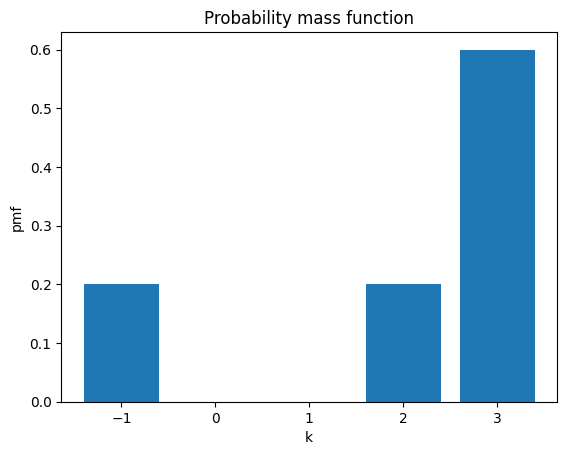

In [6]:
import matplotlib.pyplot as plt

k = sorted(set(X.values()))
pmf_X = [pmf(X, x, omega) for x in k]

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

Plot the pmf of a loaded die for which the side 6 is twice as likely as any other.

In [7]:
# Your code here

---

### Bernoulli distribution

Description
: The probability distribution of a single experiment for which
the outcome is one of two possible values.

Example
: Tossing of a (possibly unfair) coin.

Notation
: Bernoully(p); Ber(p)

Parameters
: $0 \leq p \leq 1$

Support (values of X)
: $k \in {0,1}$

pmf
: $\begin{cases} p& \text{if}\ k=1 \\ 1-p& \text{if}\ k=0 \end{cases}$

sometimes also written as $p^k \cdot (1-p)^{1-k}$
  
Mean
: $p$ 

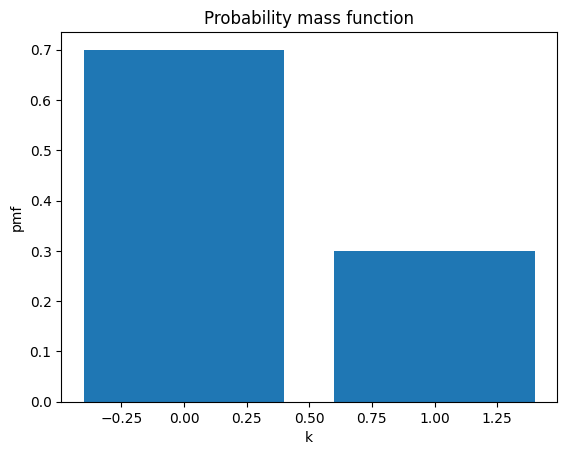

In [8]:
from scipy.stats import bernoulli
p = 0.3
k = [0, 1]
pmf_X = bernoulli.pmf(k, p)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

### Poisson distribution

Description
: Probability of a given number of events occuring in a fixed interval of time or space.

Example
: Number of phone calls $k$ received in a day, given that we expect $\lambda$ calls a day on average.

Notation
: Pois($\lambda$)

Parameters
: $\lambda \in \mathbb{R}^+$

Support
: $k \in \mathbb{N}_0$

pmf
: $\frac{\lambda^ke^{-\lambda}}{k!}$

Mean
: $\lambda$

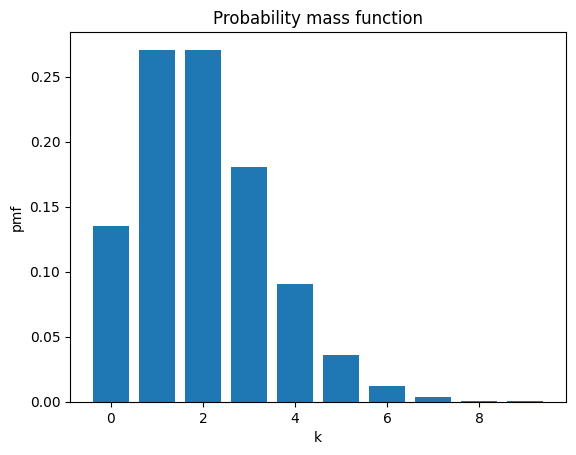

In [9]:
from scipy.stats import poisson
lambda_ = 2
k=range(10)

pmf_X = poisson.pmf(k, lambda_)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

Calculate the pmf $p(1)$ for a Poisson distribution of parameter $\lambda = 1$ using `scipy.stats`, then using the formula directly. *Note: constant e is available with `math.e`.*

In [10]:
# Your code here

---

## Continuous random variables

> A random variable $X$ is _continuous_ if for some function $f:\mathbb{R} \to \mathbb{R}$ and for any numbers $a$ and $b$ with $a \leq b$,
>
> $P(a\leq X \leq b) = \int_a^bf(x) \,dx$.
> 
> The function $f$ has to satisfy $f(x) \geq 0$ for all $x$ and $\int_{-\infty}^{\infty}f(x) \,dx=1$
>
> We call $f$ the probability density function (pdf) of X.

Examples:
* height of a person
* how much weight a bridge can hold
* price of a car

### Normal (Gaussian) distribution

Description
: One of the most important distributions in probability theory and statistics since, among other things, it can model measurement errors and the average of any other distribution.

Example
: Height of a person can be approximated as a normal distribution.

Notation
: $N( \mu, \sigma^2)$

Parameters:
* $\mu \in \mathbb{R}$ (mean, location)
* $\sigma^2 > 0$ (variance, squared standard deviation. In scikit, this is the square of the scale parameter.)

Support (values of X)
: $x \in \mathbb{R}$

pdf
: $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$
  
Mean
: $\mu$ 

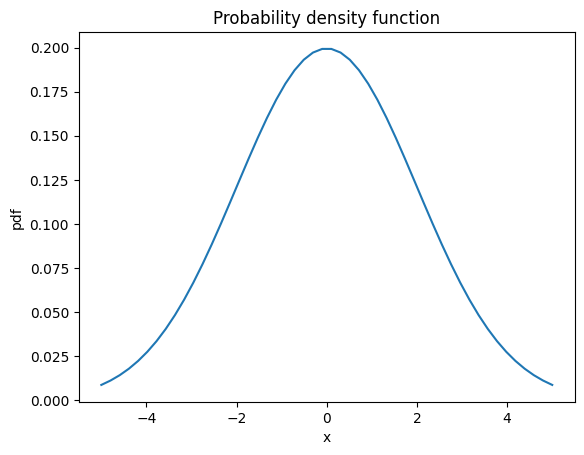

In [11]:
from scipy.stats import norm
import numpy as np
mu = 0
sigma = 2
x = np.linspace(-5, 5)
pdf_X = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf_X)
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.show()

If we are interested int the probability that a value is up to and including $x$, we can plot the _cumulative distribution function_:

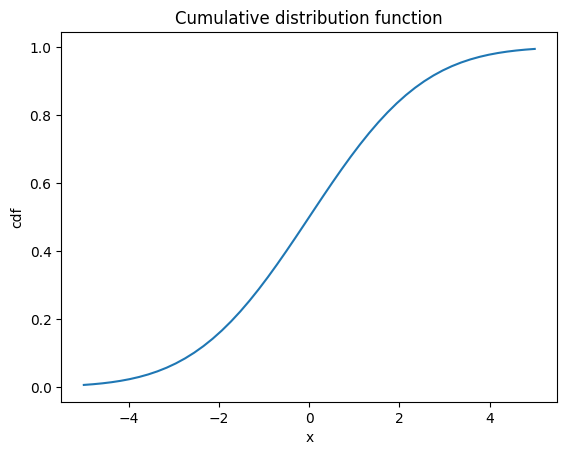

In [12]:
from scipy.stats import norm
import numpy as np
mu = 0
sigma = 2
x = np.linspace(-5, 5)
cdf_X = norm.cdf(x, mu, sigma)

fig, ax = plt.subplots(1, 1)
ax.plot(x, cdf_X)
plt.ylabel("cdf")
plt.xlabel("x")
plt.title("Cumulative distribution function")
plt.show()

---
**Give it a try!**

Grades at an exam follow the distribution $N( 5, 1.5^2)$. What percentage of students failed the exam if the minimum grade to pass is 4?

In [13]:
# Your code here

Expected result: ~0.252

---

## Expectation

> The _expectation_ of a discrete random variable $X$ taking the values $a_1, a_2,...$ and with probability mass function $p$ is the number
>
> $E[X] = \sum_i a_iP(X = a_i) = \sum_i a_ip(a_i)$

Also called _mean_ or _expected value_.

mean is 2.0


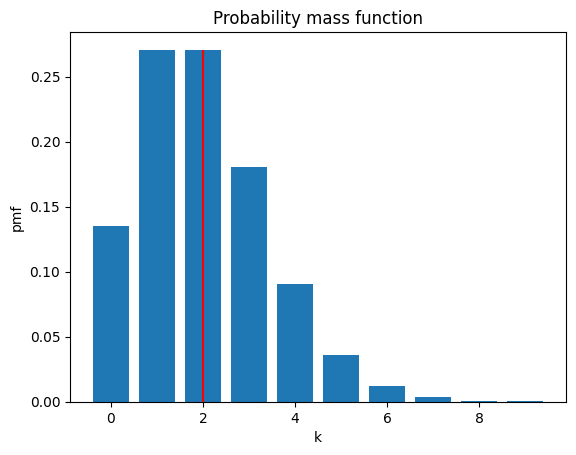

In [14]:
from scipy.stats import poisson
lambda_ = 2
k=range(10)

pmf_X = poisson.pmf(k, lambda_)

mean = poisson.mean(lambda_)
print('mean is', mean)

fig, ax = plt.subplots(1, 1)
ax.bar(k, pmf_X)
ax.vlines(mean, 0, max(pmf_X), colors='red')
plt.ylabel("pmf")
plt.xlabel("k")
plt.title("Probability mass function")
plt.show()

---
**Give it a try!**

What is the mean of the random variable $X$ with the corresponding pmf below?

In [15]:
X = {'A': 1, 'B': 2, 'C': 3}
k = [1, 2, 3]
pmf_X=[0.2, 0.2, 0.6]
# Your code here

Expected result: 2.4

---

> The _expectation_ of a continuous random variable $X$ with probability density function $f$ is the number
>
> $E[X] = \int_{- \infty}^{\infty} xf(x) \,dx$

mean is 7.0


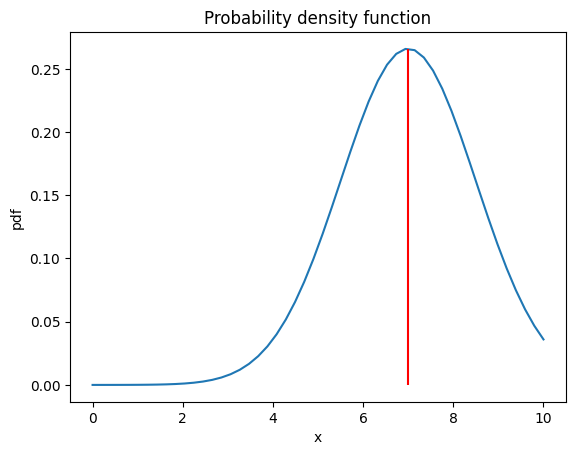

In [16]:
from scipy.stats import norm
import numpy as np
mu = 7
sigma = 1.5
x = np.linspace(0, 10)
pdf_X = norm.pdf(x, mu, sigma)

mean = norm.mean(mu, sigma)
print('mean is', mean)

fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf_X)
ax.vlines(mean, 0, max(pdf_X), colors='red')
plt.ylabel("pdf")
plt.xlabel("x")
plt.title("Probability density function")
plt.show()

Properties:
1. $E[aX+b] = aE[X]+b$ with $a, b \in \mathbb{R}$ ("change of unit" formula)
2. $E[X+Y] = E[X] + E[Y]$
3. $E[g(X)] = \sum_ig(a_i)P(X=a_i)$ where X is a discrete variable taking the values $a_1, a_2,...$ and $g$ is a function $g:\mathbb{R} \to \mathbb{R}$ ("change of variable" formula)
4. $E[XY]=E[X]E[Y]$, if X,Y independent.

## Variance and standard deviation

> The _variance_ Var(X) of a random variable $X$ is the number
>
> $Var(X) = E[(X-E[X])^2]$

Variance is a measure of the spread of the data.

In [17]:
from scipy.stats import poisson
lambda_ = 2

var = poisson.var(lambda_)
print('variance is', var)

variance is 2.0


The _standard deviation_ is simply the square root of variance, representing the spread of data in normal units:

$\sigma = \sqrt{Var(X)}$

Properties:
* $Var(aX +b) = a^2Var(X)$
* $Var(X) = E[X^2] - E^2[X]$
* $Var(X+Y) = Var(X) + Var(Y)$ - only for independent variables.

---

**Give it a try!**

Given a random variable $X$ with $E[X]=1$ and $Var(X)=1$, calculate:

1. $E[3X]$
2. $Var(3X)$
3. $Var(X+3)$

Expected results: 3, 9, 1.

---

## Covariance

> For two jointly distributed real-valued random variables $X$ and $Y$ with finite second moments, the covariance is defined as the expected value (or mean) of the product of their deviations from their individual expected values:
> 
> $Cov(X, Y) = E[(X-E[X])(Y-E[Y])]$

By using the linearity properties of the expectation, it can be shown that:

$Cov(X, Y) = E[XY] - E[X]E[Y]$

For two independent variables $X$ and $Y$, $Cov(X, Y) = 0$, but the inverse is not necessarilty true, since covariance only measures linear dependence.